In [13]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.cluster.vq import kmeans
from scipy.spatial.distance import cdist,pdist
from sklearn.decomposition import RandomizedPCA
import numpy as np
import scipy.stats as stats

df = pd.read_pickle('../data/relationship_features_forclustering_daily.pandas_df')

df = df[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df = df[df["message_count"]!=0]

df_h= pd.read_pickle('../data/relationship_features_high')

df_l = pd.read_pickle('../data/relationship_features_low')

df_high = df_h[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]
df_low = df_l[["message_count","compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]

df.fillna(0,inplace = True)
df_high.fillna(0,inplace = True)
df_low.fillna(0,inplace = True)

/home/sophie/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [3]:
df_high['label']=1
df_low['label']=0

label_data = pd.concat([df_high,df_low])

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

train, test = train_test_split(label_data, test_size = 0.2)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

predictors =["compound","message_count_reciprocity","word_count","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]

X_train = train[predictors]
y_train = train["label"]

X_test = test[predictors]
y_test = test["label"]

model = LogisticRegression()
model = model.fit(X_train, y_train)

probs = model.predict_proba(X_test)

In [5]:
pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)))

,0,1
0,compound,[-0.0207985809229]
1,message_count_reciprocity,[-0.611632999947]
2,word_count,[12.0150177124]
3,word_count_reciprocity,[0.957816653464]
4,response_time,[-2.24467343806]
5,response_time_reciprocity,[1.62286069354]
6,sentiment_reciprocity,[-0.0746627215143]


In [6]:
# generate class probabilities
predicted = model.predict(X_test)
print predicted

probs = model.predict_proba(X_test)
print probs

[1 0 0 ..., 1 0 1]
[[  5.17481605e-02   9.48251840e-01]
 [  6.71897850e-01   3.28102150e-01]
 [  6.69370836e-01   3.30629164e-01]
 ..., 
 [  2.78360858e-01   7.21639142e-01]
 [  6.70617554e-01   3.29382446e-01]
 [  4.12631035e-06   9.99995874e-01]]


In [7]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.769465648855
0.836869191046


In [8]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[316 151]
 [151 692]]
             precision    recall  f1-score   support

          0       0.68      0.68      0.68       467
          1       0.82      0.82      0.82       843

avg / total       0.77      0.77      0.77      1310



In [9]:
# evaluate the model using 10-fold cross-validation

X = label_data[predictors]
y = label_data["label"]
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=5)
print scores
print scores.mean()

[ 0.76048818  0.80687023  0.7480916   0.78091603  0.72421696]
0.764116599814


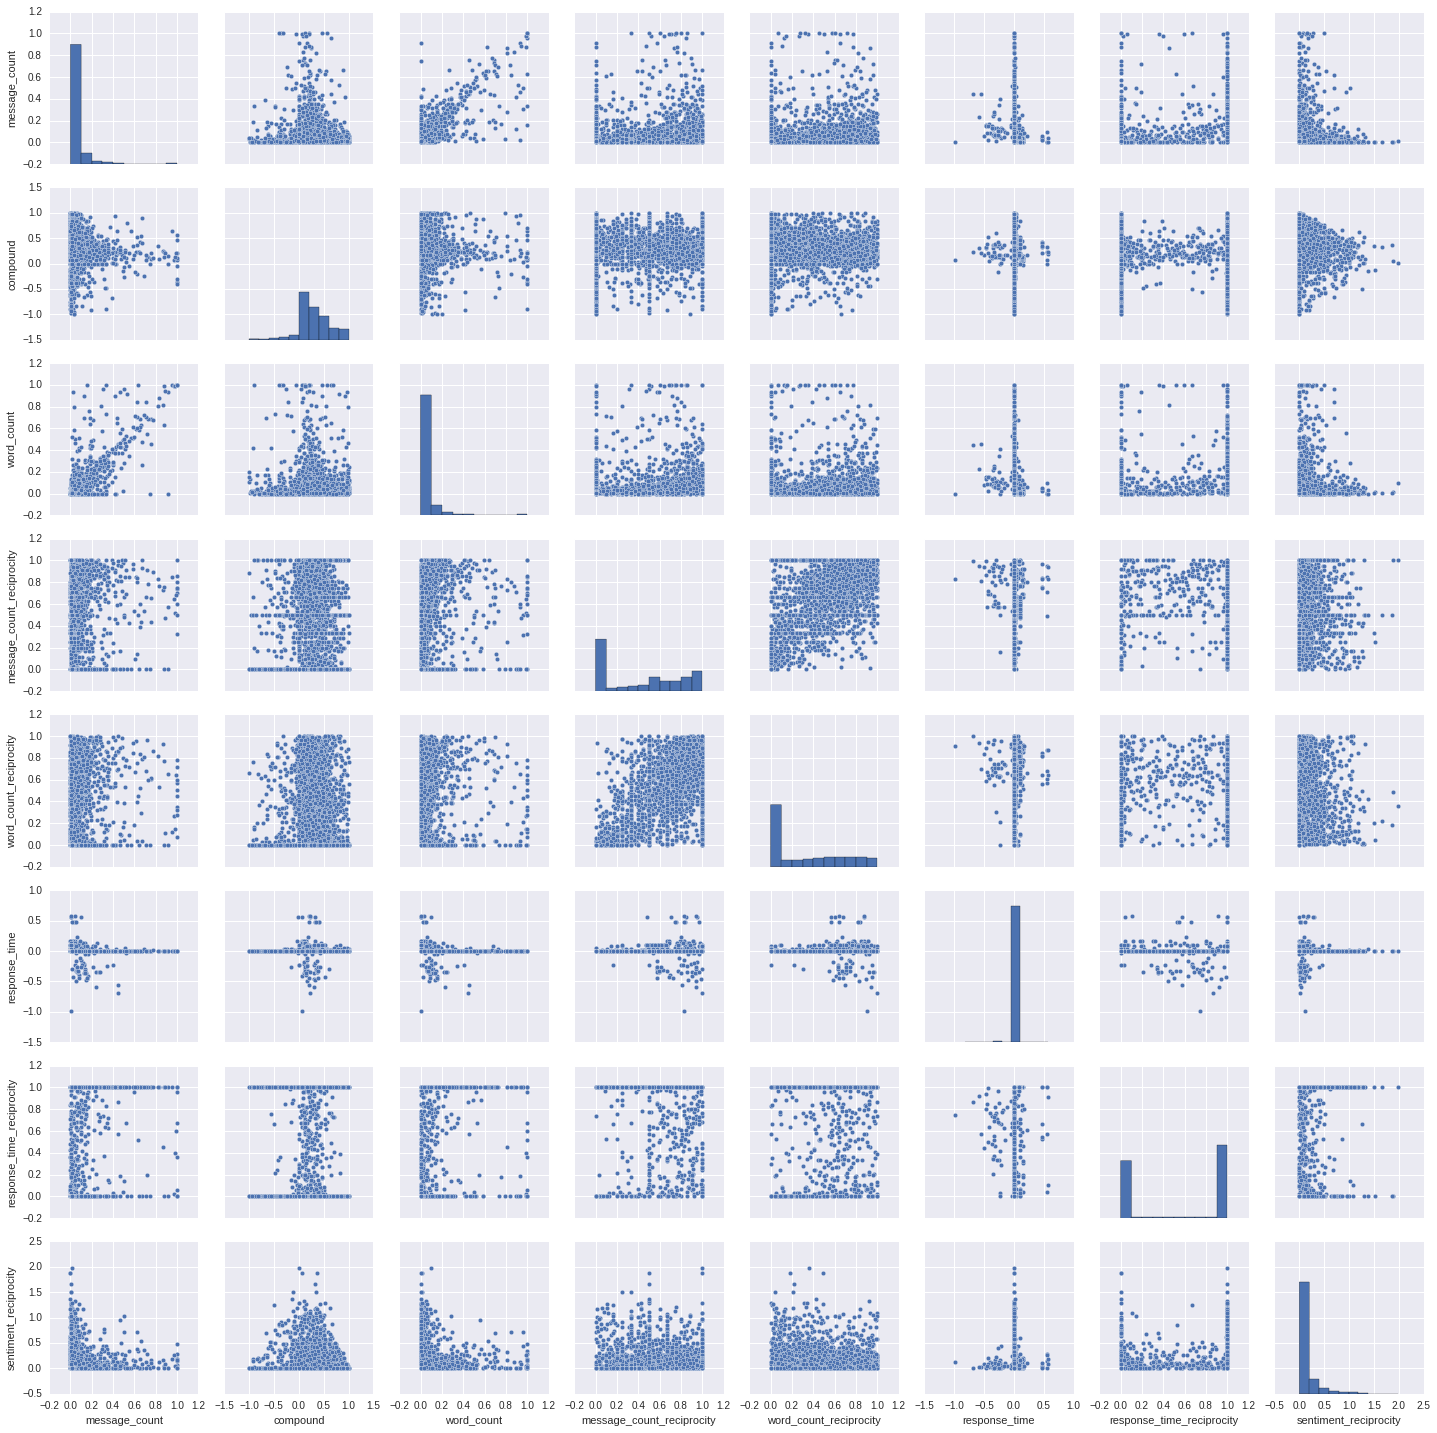

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  


s = sns.pairplot(df)

In [16]:
#predict for a particular case 

df = pd.read_csv("../data/user_df/data_frame_12305_33103")

df.fillna(0,inplace=True)

df_new = df[["compound","word_count","message_count_reciprocity","word_count_reciprocity","response_time","response_time_reciprocity","sentiment_reciprocity"]]


output = model.predict_proba(df_new)
positive =output[:,1]

print positive.mean()

df_new["output"] = positive
df_new["dates"] = df["sent_at"]

df_new

0.816477374077


/home/sophie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sophie/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,compound,word_count,message_count_reciprocity,word_count_reciprocity,response_time,response_time_reciprocity,sentiment_reciprocity,output,dates
0,0.473757,0.323876,0.750000,0.342334,0.0,1.0,0.063547,0.999956,0.0
1,0.765575,0.241908,1.000000,0.186598,0.0,1.0,0.091929,0.999998,0.0
2,0.563450,0.069777,0.263158,0.941520,0.0,1.0,0.203760,0.992651,0.0
3,0.000000,0.003993,1.000000,0.000000,0.0,0.0,0.000000,0.999988,0.0
4,0.273200,0.005044,0.166667,0.000000,0.0,1.0,0.000000,0.948115,0.0
5,0.654075,0.038041,0.600000,0.740385,0.0,1.0,0.121350,0.999847,0.0
6,0.317543,0.081337,0.214286,0.205607,0.0,1.0,0.244017,0.973628,0.0
7,0.585900,0.014082,0.200000,0.000000,0.0,1.0,0.000000,0.964220,0.0
8,-0.318200,0.006305,0.500000,0.153846,0.0,0.0,0.000000,0.995707,0.0
9,0.000000,0.001051,0.666667,0.250000,0.0,1.0,0.000000,0.999895,0.0
